# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys_weather import api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lats_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lats_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 596


['illoqqortoormiut',
 'hermanus',
 'hobart',
 'souillac',
 'ushuaia',
 'ponta do sol',
 'rikitea',
 'manicore',
 'san patricio',
 'kapaa',
 'mahebourg',
 'westport',
 'kushmurun',
 'punta arenas',
 'mataura',
 'hithadhoo',
 'izhma',
 'fortuna',
 'albany',
 'qaanaaq',
 'madison',
 'torbay',
 'amderma',
 'jiaozuo',
 'husavik',
 'puerto ayora',
 'vao',
 'rudbar',
 'shenkursk',
 'egvekinot',
 'tuktoyaktuk',
 'hambantota',
 'conceicao da barra',
 'avarua',
 'coffs harbour',
 'vanimo',
 'clyde river',
 'iqaluit',
 'rumoi',
 'cam ranh',
 'barentsburg',
 'busselton',
 'umzimvubu',
 'port alfred',
 'caravelas',
 'jamestown',
 'port elizabeth',
 'cabo san lucas',
 'okhotsk',
 'camacari',
 'bredasdorp',
 'morehead',
 'crab hill',
 'khatanga',
 'wichita falls',
 'new norfolk',
 'airai',
 'arraial do cabo',
 'cape town',
 'bluff',
 'moose factory',
 'dikson',
 'pisco',
 'sola',
 'zalantun',
 'pandan',
 'taolanaro',
 'raudeberg',
 'marawi',
 'narsaq',
 'barrow',
 'provideniya',
 'kudahuvadhoo',
 'up

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | manicore
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | mahebourg
Processing Record 12 of Set 1 | westport
Processing Record 13 of Set 1 | kushmurun
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | izhma
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | madison
Processing Record 22 of Set 1 | torbay
Processing Rec

Processing Record 37 of Set 4 | savantvadi
Processing Record 38 of Set 4 | luangwa
Processing Record 39 of Set 4 | zaysan
Processing Record 40 of Set 4 | ilebo
Processing Record 41 of Set 4 | birin
Processing Record 42 of Set 4 | amberley
Processing Record 43 of Set 4 | rampur hat
Processing Record 44 of Set 4 | iquique
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | korla
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | sumbe
Processing Record 49 of Set 4 | nizhniy kuranakh
Processing Record 0 of Set 5 | andra
Processing Record 1 of Set 5 | hami
Processing Record 2 of Set 5 | bilma
Processing Record 3 of Set 5 | barcelos
Processing Record 4 of Set 5 | trelew
Processing Record 5 of Set 5 | plouzane
Processing Record 6 of Set 5 | vila velha
Processing Record 7 of Set 5 | asau
Processing Record 8 of Set 5 | padang
Processing Record 9 of Set 5 | oppdal
Processing Record 10 of Set 5 | jadu
Processing Record 11 of Set 5 | college
Processing Recor

Processing Record 27 of Set 8 | pitimbu
Processing Record 28 of Set 8 | kaeo
Processing Record 29 of Set 8 | carnot
Processing Record 30 of Set 8 | ndele
Processing Record 31 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 32 of Set 8 | wagar
Processing Record 33 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 34 of Set 8 | mackay
Processing Record 35 of Set 8 | abu samrah
Processing Record 36 of Set 8 | terrace
Processing Record 37 of Set 8 | fort nelson
Processing Record 38 of Set 8 | te anau
Processing Record 39 of Set 8 | geraldton
Processing Record 40 of Set 8 | matagami
Processing Record 41 of Set 8 | tautira
Processing Record 42 of Set 8 | hasaki
Processing Record 43 of Set 8 | penzance
Processing Record 44 of Set 8 | carayao
Processing Record 45 of Set 8 | gamba
Processing Record 46 of Set 8 | tezu
Processing Record 47 of Set 8 | burnie
Processing Record 48 of Set 8 | la rioja
Processing Record 49 of Set 8 | huescar
Processing Record 0 of Se

Processing Record 15 of Set 12 | anchorage
Processing Record 16 of Set 12 | khristoforovo
City not found. Skipping...
Processing Record 17 of Set 12 | varzea da palma
Processing Record 18 of Set 12 | anahuac
Processing Record 19 of Set 12 | neuquen
Processing Record 20 of Set 12 | bodden town
Processing Record 21 of Set 12 | artyk
City not found. Skipping...
Processing Record 22 of Set 12 | qandala
Processing Record 23 of Set 12 | kattivakkam
Processing Record 24 of Set 12 | agva
City not found. Skipping...
Processing Record 25 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 26 of Set 12 | grand centre
City not found. Skipping...
Processing Record 27 of Set 12 | coari
Processing Record 28 of Set 12 | gonzalez
Processing Record 29 of Set 12 | nizhnyaya poyma
Processing Record 30 of Set 12 | lithgow
Processing Record 31 of Set 12 | surt
Processing Record 32 of Set 12 | touros
Processing Record 33 of Set 12 | falmouth
Processing Record 34 of Set 12 | turukhansk
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,289.15,63,99,3.82,ZA,1670093259
1,hobart,-42.8794,147.3294,287.07,88,100,2.06,AU,1670093228
2,souillac,-20.5167,57.5167,297.36,78,40,1.54,MU,1670093434
3,ushuaia,-54.8000,-68.3000,283.94,61,75,9.26,AR,1670093257
4,ponta do sol,32.6667,-17.1000,289.82,80,54,5.36,PT,1670093435


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("Output_Data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,289.15,63,99,3.82,ZA,1670093259
1,hobart,-42.8794,147.3294,287.07,88,100,2.06,AU,1670093228
2,souillac,-20.5167,57.5167,297.36,78,40,1.54,MU,1670093434
3,ushuaia,-54.8000,-68.3000,283.94,61,75,9.26,AR,1670093257
4,ponta do sol,32.6667,-17.1000,289.82,80,54,5.36,PT,1670093435


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

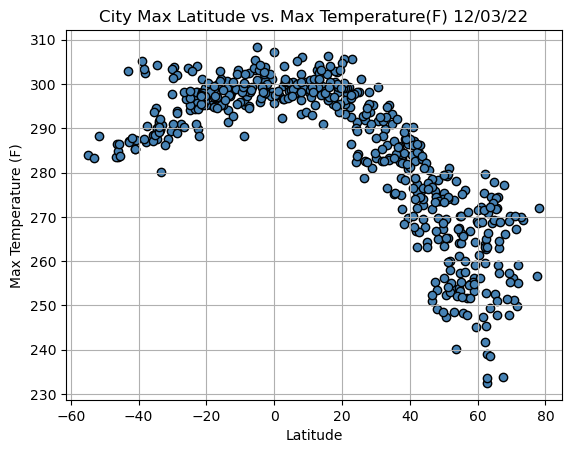

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Max Temperature(F) "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

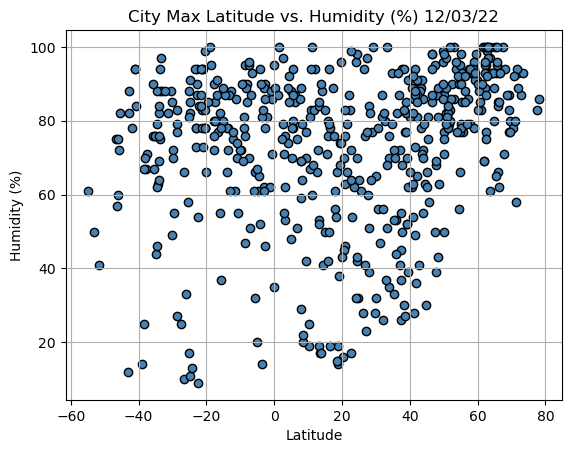

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

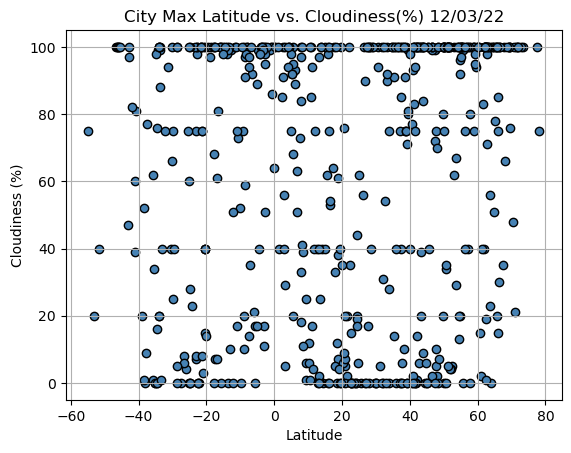

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

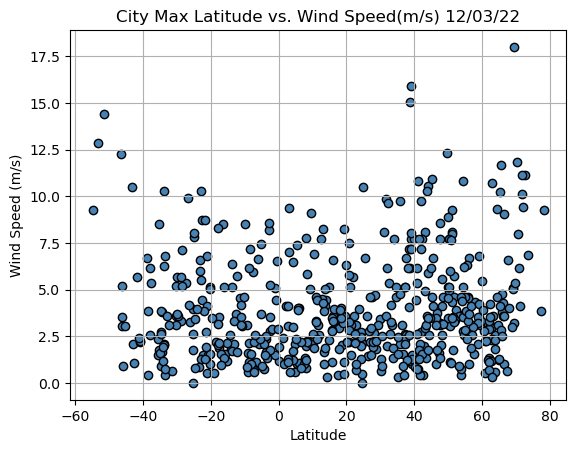

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color='steelblue', edgecolor='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Wind Speed(m/s) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,ponta do sol,32.6667,-17.1000,289.82,80,54,5.36,PT,1670093435
7,san patricio,28.0170,-97.5169,298.08,84,100,2.66,US,1670093274
8,kapaa,22.0752,-159.3190,299.33,87,100,5.66,US,1670093136
10,westport,41.1415,-73.3579,287.05,89,100,10.80,US,1670093141
11,kushmurun,52.4503,64.6311,253.90,90,5,3.92,KZ,1670093437


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,289.15,63,99,3.82,ZA,1670093259
1,hobart,-42.8794,147.3294,287.07,88,100,2.06,AU,1670093228
2,souillac,-20.5167,57.5167,297.36,78,40,1.54,MU,1670093434
3,ushuaia,-54.8000,-68.3000,283.94,61,75,9.26,AR,1670093257
5,rikitea,-23.1203,-134.9692,296.54,73,7,6.58,PF,1670093359


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and max temperature (r-value) is: -0.86
The the regression equation for latitude and max temperature is: y=-0.74x+307.96


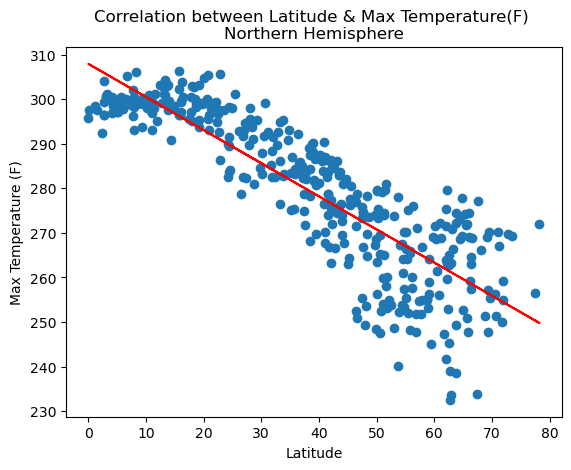

In [14]:
# Linear regression on Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temperature (r-value) is: {correlation}")
print(f"The the regression equation for latitude and max temperature is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.title("Correlation between Latitude & Max Temperature(F) \nNorthern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig5.png")
plt.show()

The correlation between latitude and max temperature (r-value) is: 0.67
The the regression equation for latitude and max temperature is: y=0.29x+302.06


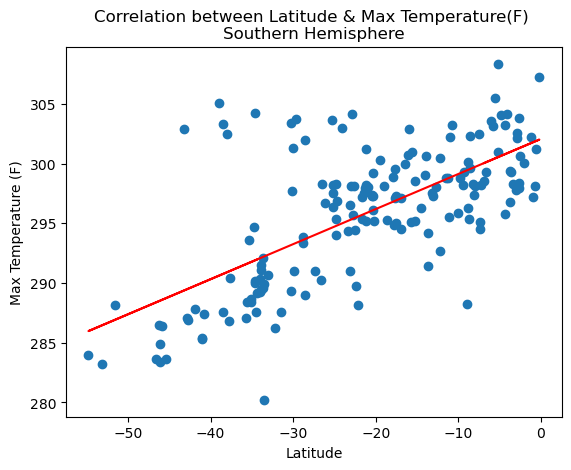

In [15]:
# Linear regression on Southern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])[0],2)
print(f"The correlation between latitude and max temperature (r-value) is: {correlation}")
print(f"The the regression equation for latitude and max temperature is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.title("Correlation between Latitude & Max Temperature(F) \nSouthern Hemisphere")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig6.png")
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity (r-value) is: 0.38
The the regression equation for latitude and humidity is: y=0.4x+58.62


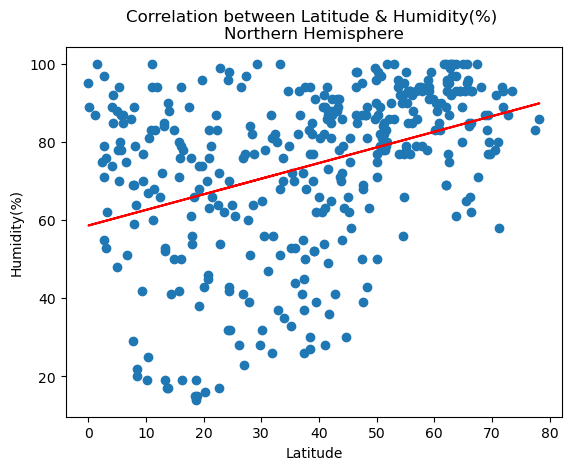

In [16]:
# Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])[0],2)
print(f"The correlation between latitude and humidity (r-value) is: {correlation}")
print(f"The the regression equation for latitude and humidity is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.title("Correlation between Latitude & Humidity(%) \nNorthern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig7.png")
plt.show()

The correlation between latitude and humidity (r-value) is: 0.1
The the regression equation for latitude and humidity is: y=0.15x+75.2


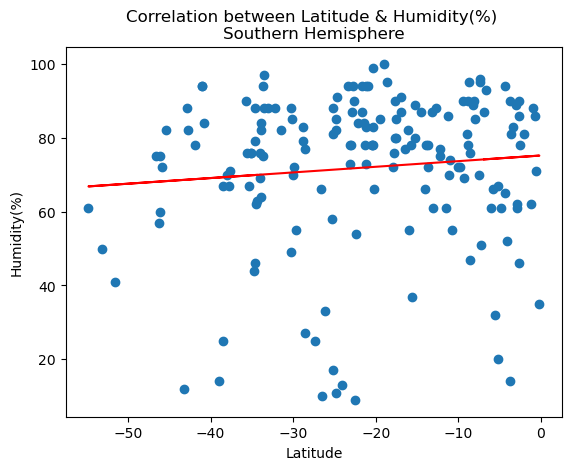

In [17]:
# Southern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])[0],2)
print(f"The correlation between latitude and humidity (r-value) is: {correlation}")
print(f"The the regression equation for latitude and humidity is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.title("Correlation between Latitude & Humidity(%) \nSouthern Hemisphere")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig8.png")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness (r-value) is: 0.24
The the regression equation for latitude and cloudiness is: y=0.49x+43.28


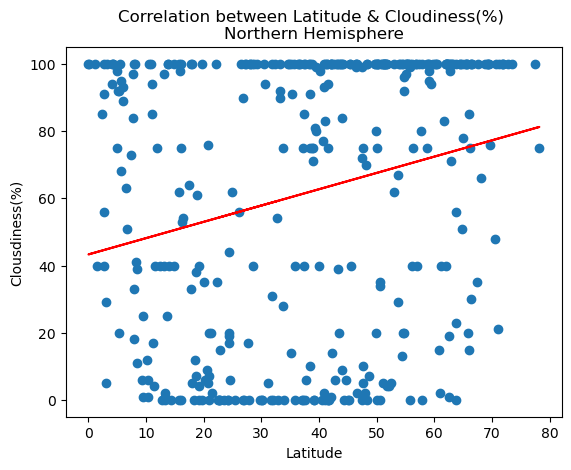

In [18]:
# Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])[0],2)
print(f"The correlation between latitude and cloudiness (r-value) is: {correlation}")
print(f"The the regression equation for latitude and cloudiness is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.title("Correlation between Latitude & Cloudiness(%) \nNorthern Hemisphere")
plt.ylabel("Clousdiness(%)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig9.png")
plt.show()

The correlation between latitude and cloudiness (r-value) is: 0.14
The the regression equation for latitude and cloudiness is: y=0.44x+70.84


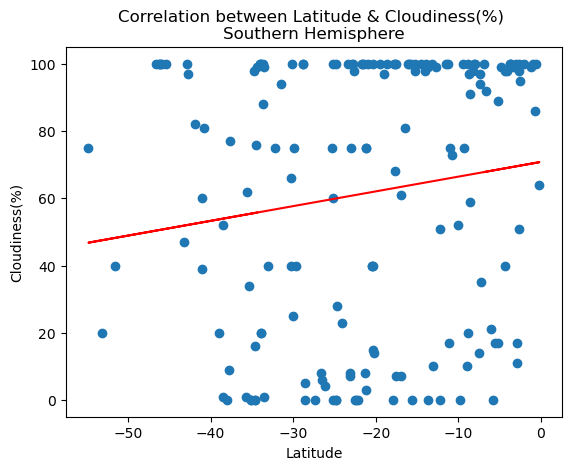

In [19]:
# Southern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])[0],2)
print(f"The correlation between latitude and cloudiness (r-value) is: {correlation}")
print(f"The the regression equation for latitude and cloudiness is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.title("Correlation between Latitude & Cloudiness(%) \nSouthern Hemisphere")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig10.png")
plt.show()

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed (r-value) is: 0.2
The the regression equation for latitude and wind speed is: y=0.03x+2.86


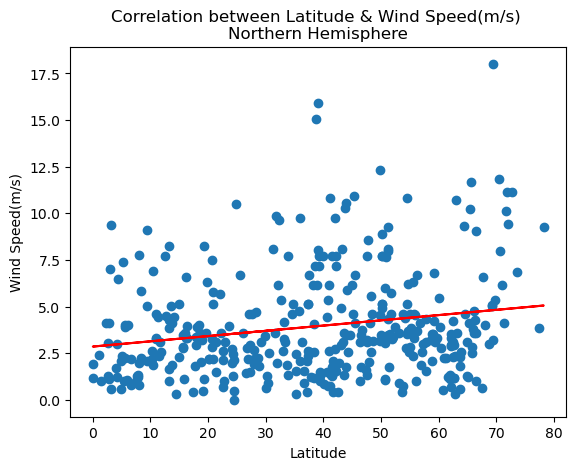

In [20]:
# Northern Hemisphere

# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])[0],2)
print(f"The correlation between latitude and wind speed (r-value) is: {correlation}")
print(f"The the regression equation for latitude and wind speed is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.title("Correlation between Latitude & Wind Speed(m/s) \nNorthern Hemisphere")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")

plt.plot(northern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig11.png")
plt.show()

The correlation between latitude and wind speed (r-value) is: -0.23
The the regression equation for latitude and wind speed is: y=-0.05x+2.67


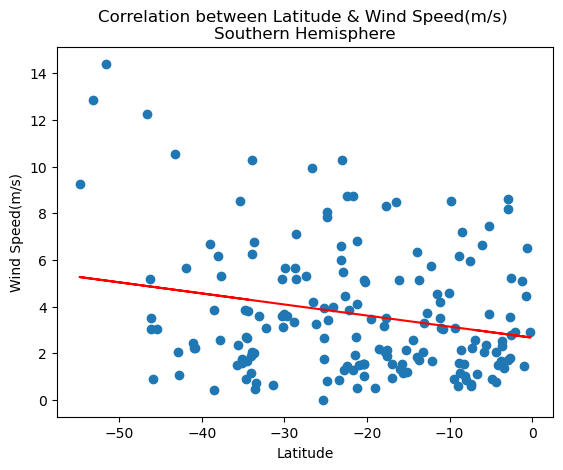

In [21]:
# Southern Hemisphere
# Perform a linear regression on latitude versus max temperature
(slope,intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))

# Caculate correlation coefficient
correlation = round(st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])[0],2)
print(f"The correlation between latitude and wind speed (r-value) is: {correlation}")
print(f"The the regression equation for latitude and wind speed is: {line_eq}")


# plt.plot(x_values, y_values)
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.title("Correlation between Latitude & Wind Speed(m/s) \nSouthern Hemisphere")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")

plt.plot(southern_hemi_df["Lat"],regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))

plt.savefig("output_data/Fig12.png")
plt.show()